In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns
import numpy as np  # 导入 numpy
from scipy.stats import kruskal
import glob
import os
os.chdir('/cluster/home/futing/Project/GBM/HiC/10loop/consensus/cytoscape')
font_files = font_manager.findSystemFonts(fontpaths='/cluster/home/futing/miniforge-pypy3/envs/HiC/fonts/')
 😩
for file in font_files:
    font_manager.fontManager.addfont(file)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial'] 
plt.rcParams['pdf.fonttype'] = 42
RNA=pd.read_csv('/cluster/home/futing/Project/GBM/HiC/hubgene/new/TPM_avg_updated.txt')

In [ ]:
loopnum=pd.DataFrame(index=['E-E','E-P','P-P','other'])
loopfrac=pd.DataFrame(index=['E-E','E-P','P-P','other'])
celllist=['GBM', 'NPC', 'iPSC', 'NHA']
for i in celllist:
	file = pd.read_csv(f'{i}/{i}_loop.bed',sep='\t')
	dupfile=file.loc[:,['loopid','E-E','E-P','P-P','other']].drop_duplicates()
	EE = dupfile['E-E'].sum()
	EP = dupfile['E-P'].sum()
	PP = dupfile['P-P'].sum()
	other = dupfile['other'].sum()
	loopnum[i] = [EE, EP, PP, other]
	# 除所有loop的数量
	loopid = dupfile['loopid'].nunique()
	print(loopid)
	loopfrac[i] = [EE / loopid, EP / loopid, PP / loopid, other / loopid]

# loopfrac = loopnum.apply(lambda x: x / x.sum(), axis=0)
print(loopfrac)
print(loopnum)


31487
27538
31747
43255
            GBM       NPC      iPSC       NHA
E-E    0.381554  0.230373  0.015246  0.048295
E-P    0.397910  0.287348  0.067880  0.143706
P-P    0.193921  0.175249  0.155920  0.209594
other  0.503986  0.627533  0.825558  0.758248
         GBM    NPC   iPSC    NHA
E-E    12014   6344    484   2089
E-P    12529   7913   2155   6216
P-P     6106   4826   4950   9066
other  15869  17281  26209  32798


In [ ]:
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import LinearSegmentedColormap
bluered=["#16365F","#77A3BB","#F8F2ED","#D64F38"]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#1065ad' ,'white', '#bc020f' ])
mypalette = ['#a6cee3','#33a02c','#b2df8a','#1f78b4','#e31a1c','#fb9a99','#fdbf6f']

df_long = loopfrac.reset_index().melt(id_vars="index", var_name="Sample", value_name="Count")
df_long.rename(columns={"index": "Category"}, inplace=True)
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=df_long, x="Category", y="Count", hue="Sample", palette=bluered, 
			ax=ax,    linewidth=0.5,      # 边线粗细（默认0，无边框）
    	edgecolor="black")   # 边线颜色（默认None）)

# 设置y轴为百分制
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 假设数据范围是 0~1（如 0.5 显示为 50%）
# 如果数据范围是 0~100，则用 PercentFormatter(100)

sns.despine()
ax.set_ylabel('fraction of loops (%)')  # 修改ylabel单位
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('loopfraction.pdf', format='pdf', dpi=500, bbox_inches='tight', pad_inches=0.5)

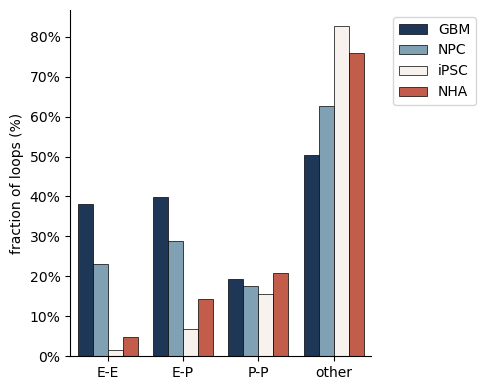

In [ ]:
from matplotlib.ticker import PercentFormatter
from matplotlib.colors import LinearSegmentedColormap
bluered=["#16365F","#77A3BB","#F8F2ED","#D64F38"]
custom_cmap = LinearSegmentedColormap.from_list('custom_cmap', ['#1065ad' ,'white', '#bc020f' ])
mypalette = ['#a6cee3','#33a02c','#b2df8a','#1f78b4','#e31a1c','#fb9a99','#fdbf6f']

df_long = loopfrac.reset_index().melt(id_vars="index", var_name="Sample", value_name="Count")
df_long.rename(columns={"index": "Category"}, inplace=True)
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=df_long, x="Category", y="Count", hue="Sample", palette=bluered, 
			ax=ax,    linewidth=0.5,      # 边线粗细（默认0，无边框）
    	edgecolor="black")   # 边线颜色（默认None）)

# 设置y轴为百分制
ax.yaxis.set_major_formatter(PercentFormatter(1.0))  # 假设数据范围是 0~1（如 0.5 显示为 50%）
# 如果数据范围是 0~100，则用 PercentFormatter(100)

sns.despine()
ax.set_ylabel('fraction of loops (%)')  # 修改ylabel单位
ax.set_xlabel('')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('loopfraction.pdf', format='pdf', dpi=500, bbox_inches='tight', pad_inches=0.5)

In [9]:
NHA=pd.read_csv('/cluster/home/futing/Project/GBM/HiC/10loop/consensus/cytoscape/NHA/NHA.EP',sep='\t',header=None)

In [12]:
NHA[10].value_counts()

--    32982
PP     9066
PE     3941
EP     3758
EE     2105
Name: 10, dtype: int64

In [2]:
RNA.head()

NameError: name 'RNA' is not defined